### Importing the Libraries

In [4]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Embedding
from keras.preprocessing import sequence
from keras import models, layers
from keras_visualizer import visualizer
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score, accuracy_score, roc_curve, roc_auc_score
from imblearn.metrics import specificity_score
import matplotlib.pyplot as plt
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

TOP_WORDS = 8000
MAX_WORDS = 500

### Loading the Dataset, applying Padding and Splitting the data

In [5]:
# load the dataset but only keep the top n words, zero the rest
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=TOP_WORDS)

# pad dataset to a maximum review length in words
X_train = sequence.pad_sequences(X_train, maxlen=MAX_WORDS)
X_test = sequence.pad_sequences(X_test, maxlen=MAX_WORDS)

X = numpy.concatenate((X_train, X_test), axis=0)
y = numpy.concatenate((y_train, y_test), axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # split into train and test sets.

17464789/17464789 [==============================] - 0s 0us/step


### Defining the Model Architecture

In [6]:
model = Sequential()
model.add(Embedding(TOP_WORDS, 300, input_length=MAX_WORDS))
model.add(Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dropout(.8))
model.add(Dense(250, activation='relu'))
model.add(Dropout(.8))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 300)          2400000   
                                                                 
 conv1d (Conv1D)             (None, 500, 256)          230656    
                                                                 
 max_pooling1d (MaxPooling1  (None, 250, 256)          0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 250, 128)          98432     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 125, 128)          0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 16000)             0

In [ ]:
visualizer(model, file_name="cnn", file_format="png", view=True)

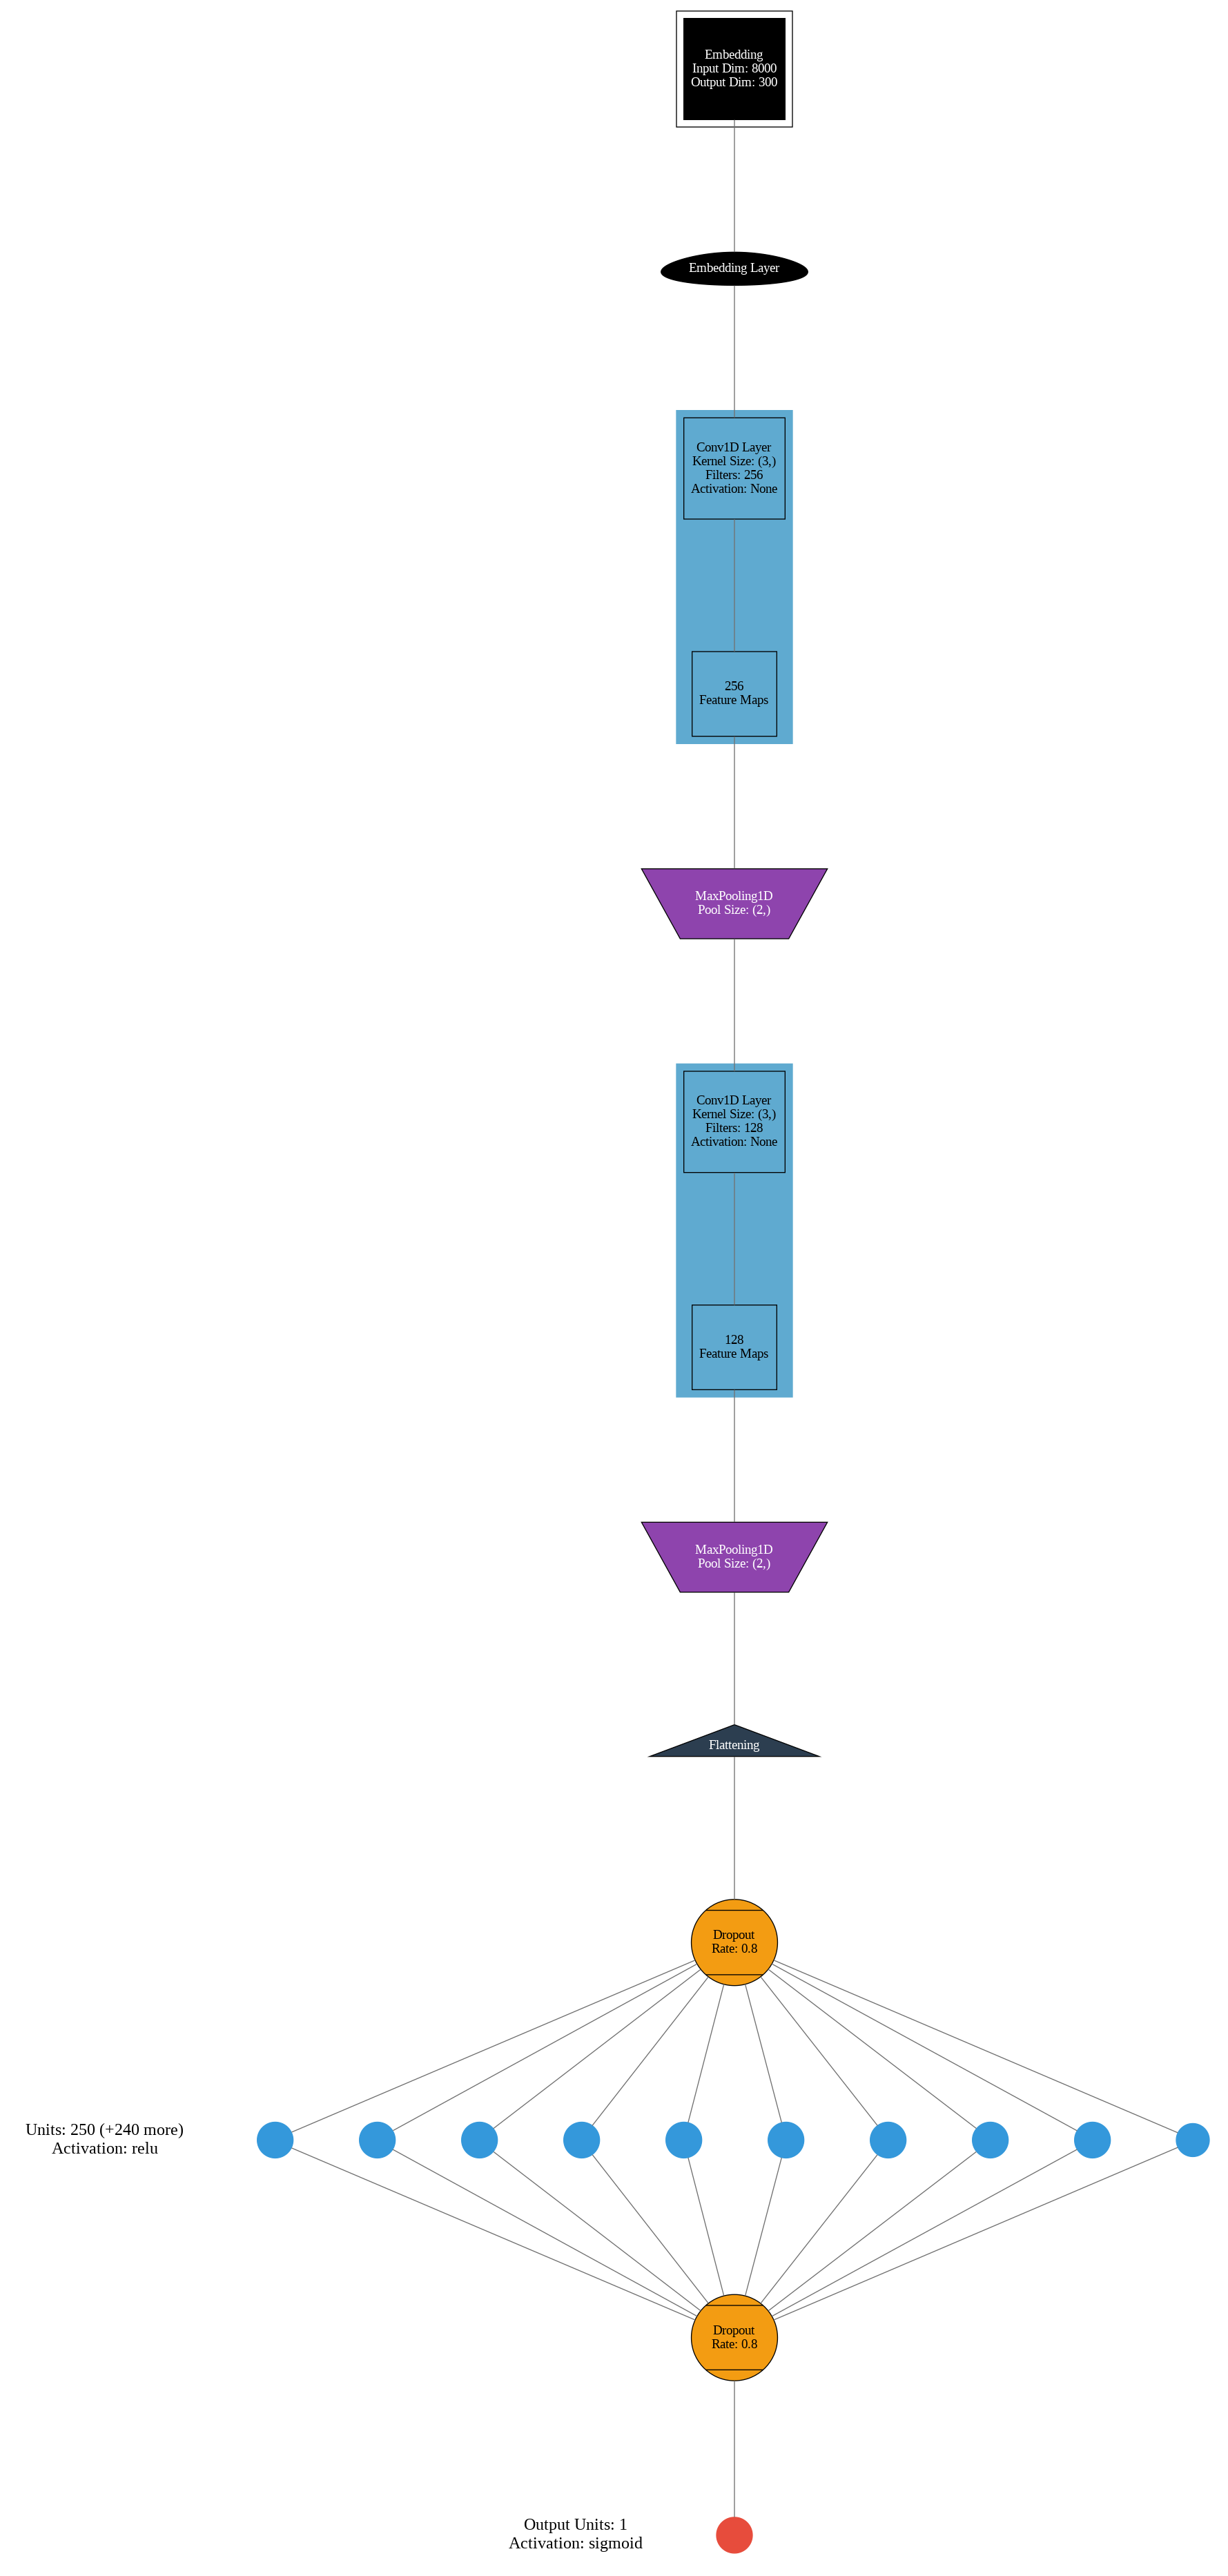

In [ ]:
img = Image.open("cnn.png")
display(img)

### Training the Model

In [ ]:
# fit the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=8, batch_size=128, verbose=1)

# final evaluation of the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

Epoch 1/8
219/219 [==============================] - 45s 174ms/step - loss: 0.6194 - accuracy: 0.6015 - val_loss: 0.2964 - val_accuracy: 0.8830
Epoch 2/8
219/219 [==============================] - 28s 130ms/step - loss: 0.2847 - accuracy: 0.8851 - val_loss: 0.2484 - val_accuracy: 0.9031
Epoch 3/8
219/219 [==============================] - 20s 91ms/step - loss: 0.2032 - accuracy: 0.9228 - val_loss: 0.2558 - val_accuracy: 0.9039
Epoch 4/8
219/219 [==============================] - 18s 82ms/step - loss: 0.1471 - accuracy: 0.9462 - val_loss: 0.2991 - val_accuracy: 0.8994
Epoch 5/8
219/219 [==============================] - 17s 75ms/step - loss: 0.1062 - accuracy: 0.9607 - val_loss: 0.3328 - val_accuracy: 0.8913
Epoch 6/8
219/219 [==============================] - 18s 80ms/step - loss: 0.0876 - accuracy: 0.9692 - val_loss: 0.3929 - val_accuracy: 0.8936
Epoch 7/8
219/219 [==============================] - 14s 64ms/step - loss: 0.0610 - accuracy: 0.9789 - val_loss: 0.4735 - val_accuracy: 0.89

### Evaluating the Model

In [ ]:
pred = model.predict(X_test)
pred = [1 if x > 0.5 else 0 for x in pred]

469/469 [==============================] - 2s 4ms/step


##### Classification Report

In [ ]:
print('Classification Report:')
print(classification_report(y_test, pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      7398
           1       0.90      0.90      0.90      7602

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000



##### Confusion Matrix

In [ ]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, pred))

Confusion Matrix:
[[6630  768]
 [ 725 6877]]


##### Evaluation Metrics

In [ ]:
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)
specificity = specificity_score(y_test, pred)
accuracy = accuracy_score(y_test, pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Specificity: {specificity}')
print(f'Accuracy: {accuracy}')

Precision: 0.8995421844342708
Recall: 0.9046303604314654
F1 Score: 0.9020790975273825
Specificity: 0.8961881589618816
Accuracy: 0.9004666666666666


##### ROC Curve

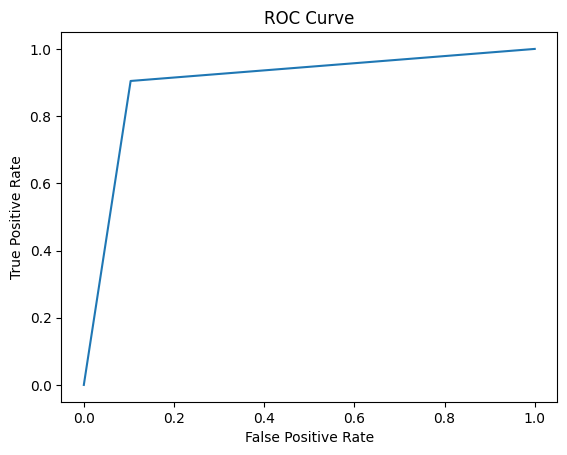

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Saving the Model

In [ ]:
model.save("cnn_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
